In [1]:
import numpy as np
import xarray as xa
from matplotlib import pyplot as plt

In [2]:
file = (
    "origin_data/e5.oper.an.vinteg.viwvt_ncwa.ll025sc.1979010100_1979013123_transect.nc"
)
data = xa.open_dataarray(file)
print(data)
print(data.time)

<xarray.DataArray 'VIWVT' (time: 744, along_transect: 64)>
array([[-125.58221 , -133.785497, -140.258829, ...,  -29.165639,  -29.941128,
         -29.05752 ],
       [-135.966137, -139.493679, -140.793448, ...,  -30.690383,  -30.712548,
         -30.211195],
       [-127.138472, -132.575161, -139.090558, ...,  -31.45183 ,  -31.632535,
         -31.802853],
       ...,
       [ -69.329056,  -71.358616,  -73.576607, ...,   55.844775,   52.428598,
          50.979996],
       [ -58.942957,  -61.833717,  -64.880336, ...,   53.219946,   52.317857,
          52.050704],
       [ -66.070036,  -68.537782,  -70.617659, ...,   41.742971,   42.011488,
          44.215221]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Dimensions without coordinates: along_transect
Attributes: (12/15)
    ecmwf_local_table:             162
    ecmwf_parameter:               71
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    long_name:      

In [3]:
file = "record/record.nc"
data = xa.open_dataarray(file)
print(data)
data_6h = data.resample(time="6H").mean()
print(data_6h.time)

<xarray.DataArray 'VIWVT' (time: 354264, along_transect: 64)>
[22672896 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2019-05-31T23:00:00
Dimensions without coordinates: along_transect
Attributes: (12/15)
    ecmwf_local_table:             162
    ecmwf_parameter:               71
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    long_name:                     Vertical integral of eastward water vapour...
    maximum_value:                 2118.2354
    minimum_value:                 -2627.7244
    ...                            ...
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric vertical integrals (ECMWF...
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    short_name:                    viwve
    units:                         kg m**-1 s**-1
    cell_methods:                  perp_transect: mean
<xarray.DataArray 'time'

In [4]:
def is_monsoon(month):
    return (month <= 9) & (month >= 6)


monsoon_ivt = data_6h.sel(time=(is_monsoon(data_6h.time.dt.month)))
monsoon_ivt = monsoon_ivt.sel(time=monsoon_ivt.time.dt.year < 2019)
print(monsoon_ivt.shape)
print(monsoon_ivt)

(19520, 64)
<xarray.DataArray 'VIWVT' (time: 19520, along_transect: 64)>
array([[ 52.80204968,  49.53075789,  45.18452607, ...,  -0.74917639,
         -3.86297681,  -5.87159778],
       [ 94.24622829,  86.55329898,  80.58888419, ...,   2.05889426,
         -1.9007385 ,  -3.28182573],
       [155.80066957, 136.60176351, 122.49906368, ...,   8.89120888,
          5.67992086,   2.63215816],
       ...,
       [ 41.89704494,  34.74832039,  28.90058409, ...,  77.3876672 ,
         74.86407476,  73.33725107],
       [ 40.76301115,  36.15619908,  32.8868101 , ..., 121.91772363,
        108.07180999,  98.70862313],
       [ 23.63523765,  19.04084969,  15.15040995, ..., 140.25049168,
        126.91898422, 112.54261934]])
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 ... 2018-09-30T18:00:00
Dimensions without coordinates: along_transect


<xarray.DataArray 'VIWVT' (along_transect: 64)>
array([378.24136391, 375.56857201, 368.40468899, 365.07491054,
       358.9028906 , 353.68401071, 349.06926233, 343.10252297,
       334.73560993, 331.22315513, 326.8605063 , 321.64752891,
       317.62660602, 312.53417517, 308.41840229, 304.88752382,
       301.25856282, 297.70775533, 292.52795856, 288.76885665,
       284.15358759, 282.01720803, 276.48112218, 270.71763609,
       264.34895418, 260.59689152, 257.78484713, 256.30358588,
       253.00601995, 248.97660404, 246.00759866, 241.8902709 ,
       238.8174096 , 234.53578117, 230.2626899 , 227.27018231,
       225.89651958, 223.49810933, 221.47451412, 219.88039355,
       218.44784781, 216.36734424, 214.75907663, 213.33527252,
       211.60185564, 210.96835933, 210.6640564 , 210.099857  ,
       209.64628157, 208.10556613, 205.55326322, 201.83791801,
       196.31773518, 189.95402288, 183.61960218, 176.67291314,
       169.4365274 , 162.34872821, 155.16519138, 148.62349047,
       

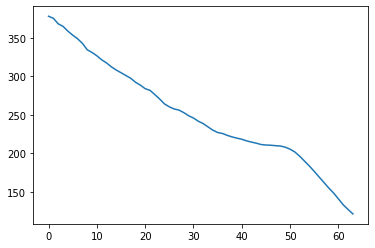

In [5]:
quantiles = monsoon_ivt.quantile(0.95, dim="time")
print(quantiles)
plt.plot(quantiles)
plt.show()

In [6]:
surge_date = []
for i in range(64):
    ivt_record = monsoon_ivt.sel(along_transect=i)
    dates = ivt_record[ivt_record > quantiles.sel(along_transect=i)].time.data
    surge_date.append(dates)
surge_date = np.concatenate(surge_date)
print(surge_date.shape)
surge_date = sorted(np.unique(surge_date))
print(len(surge_date))

(62464,)
3447


In [7]:
for i in range(20):
    print(surge_date[i])

1979-07-15T12:00:00.000000000
1979-07-15T18:00:00.000000000
1979-07-16T00:00:00.000000000
1979-07-16T06:00:00.000000000
1979-07-16T12:00:00.000000000
1979-07-16T18:00:00.000000000
1979-07-19T12:00:00.000000000
1979-07-20T06:00:00.000000000
1979-07-25T12:00:00.000000000
1979-07-29T06:00:00.000000000
1979-07-29T12:00:00.000000000
1979-07-29T18:00:00.000000000
1979-07-30T00:00:00.000000000
1979-07-30T06:00:00.000000000
1979-07-30T12:00:00.000000000
1979-07-30T18:00:00.000000000
1979-07-31T00:00:00.000000000
1979-07-31T06:00:00.000000000
1979-07-31T12:00:00.000000000
1979-08-04T12:00:00.000000000


In [8]:
year_record = monsoon_ivt.sel(time=monsoon_ivt.time.dt.year == 2018)
print(year_record)

<xarray.DataArray 'VIWVT' (time: 488, along_transect: 64)>
array([[-32.69723854, -33.89477938, -35.64000781, ..., -14.27122196,
        -15.32555191, -15.3572543 ],
       [ 27.49630952,  23.85865305,  19.0478533 , ..., -18.39700318,
        -19.07929978, -18.87197127],
       [ 63.71063903,  61.37626003,  57.44039905, ..., -16.09348125,
        -16.58245887, -16.9637654 ],
       ...,
       [ 41.89704494,  34.74832039,  28.90058409, ...,  77.3876672 ,
         74.86407476,  73.33725107],
       [ 40.76301115,  36.15619908,  32.8868101 , ..., 121.91772363,
        108.07180999,  98.70862313],
       [ 23.63523765,  19.04084969,  15.15040995, ..., 140.25049168,
        126.91898422, 112.54261934]])
Coordinates:
  * time     (time) datetime64[ns] 2018-06-01 ... 2018-09-30T18:00:00
Dimensions without coordinates: along_transect


In [9]:
def detect_surge(year, verbose=True):
    surge = {}
    count = 0
    year_record = monsoon_ivt.sel(time=monsoon_ivt.time.dt.year == year)
    ivt_high = year_record.where(year_record > quantiles)
    fig = plt.figure(figsize=(7, 7))
    ivt_high.plot()
    plt.show()
    flag = 0
    time = year_record.time.data
    for i in range(488):
        record = ivt_high.data[i]
        if len(np.where(~np.isnan(record))[0]) > 0:
            if flag == 0:
                start = i
                # print('START: ', start)
                flag = 1
                start_ind = np.where(~np.isnan(record))[0]
            ind = np.where(~np.isnan(record))[0]
            if len(np.intersect1d(ind, start_ind)) > 0:
                start_ind = ind
            else:
                end = i - 1
                if end - start >= 1:
                    if verbose:
                        print(time[start], time[end], start, end)
                start = i
                start_ind = ind
                # print(i, 'ELSE: START: ', start,' END: ',  end, ' FLAG: ', flag)
            if verbose:
                print(i, " ", ind)

        else:
            end = i - 1
            if flag == 1:
                if end - start >= 1:
                    if verbose:
                        print(time[start], time[end], start, end)
                    surge[count] = [time[start], time[end]]
                    count += 1
            flag = 0
    if flag == 1:
        if 487 - start >= 1:
            if verbose:
                print(time[start], time[487], start, 121)
            surge[count] = [time[start], time[487]]
            count += 1
    return surge, count

# individual

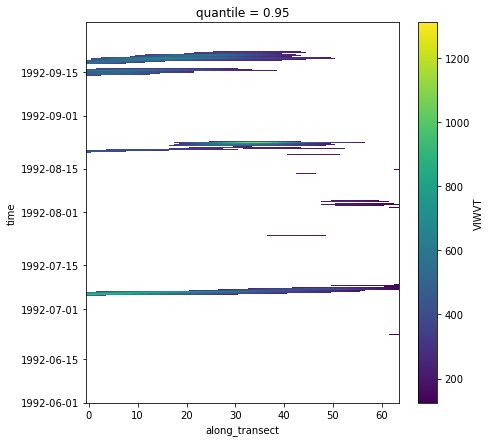

87   [62 63]
137   [0 1 2 3]
138   [ 0  1  2  3  4  5  6  7  8  9 10 11]
139   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
140   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
141   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
142   [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55]
143   [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59]
144   [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56]
145   [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 5

In [10]:
surge, count = detect_surge(1992, verbose=True)
print(count)

In [11]:
print(surge)

{0: [numpy.datetime64('1992-07-05T06:00:00.000000000'), numpy.datetime64('1992-07-07T18:00:00.000000000')], 1: [numpy.datetime64('1992-07-08T06:00:00.000000000'), numpy.datetime64('1992-07-08T18:00:00.000000000')], 2: [numpy.datetime64('1992-08-03T06:00:00.000000000'), numpy.datetime64('1992-08-03T18:00:00.000000000')], 3: [numpy.datetime64('1992-08-04T06:00:00.000000000'), numpy.datetime64('1992-08-04T18:00:00.000000000')], 4: [numpy.datetime64('1992-08-20T06:00:00.000000000'), numpy.datetime64('1992-08-23T18:00:00.000000000')], 5: [numpy.datetime64('1992-09-13T18:00:00.000000000'), numpy.datetime64('1992-09-16T06:00:00.000000000')], 6: [numpy.datetime64('1992-09-17T12:00:00.000000000'), numpy.datetime64('1992-09-21T12:00:00.000000000')]}


1992-07-05T06:00:00.000000000   1992-07-07T18:00:00.000000000


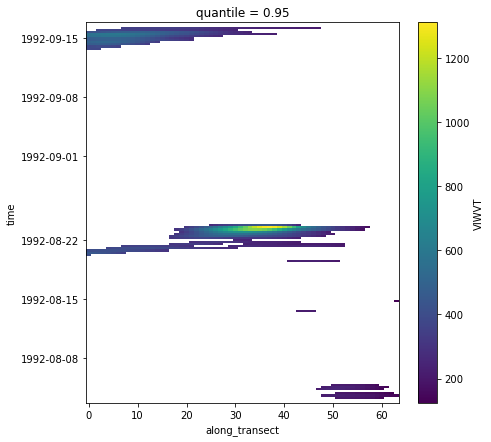

In [12]:
year_record = monsoon_ivt.sel(time=monsoon_ivt.time.dt.year == 1992)
ivt_high = year_record.where(year_record > quantiles)
print(surge[0][0], ' ', surge[0][1])
fig = plt.figure(figsize=(7, 7))
ivt_high.sel(time=slice(surge[2][0]-np.timedelta64(12, 'h'), surge[5][1]+np.timedelta64(12, 'h'))).plot()
plt.show()

1992-08-03T06:00:00.000000000   1992-08-03T18:00:00.000000000
[(45, numpy.datetime64('1992-08-03T06:00:00.000000000')), (61, numpy.datetime64('1992-08-03T06:00:00.000000000')), (61, numpy.datetime64('1992-08-03T18:00:00.000000000')), (45, numpy.datetime64('1992-08-03T18:00:00.000000000'))]
1992-08-04T06:00:00.000000000   1992-08-04T18:00:00.000000000
[(45, numpy.datetime64('1992-08-04T06:00:00.000000000')), (61, numpy.datetime64('1992-08-04T06:00:00.000000000')), (61, numpy.datetime64('1992-08-04T18:00:00.000000000')), (45, numpy.datetime64('1992-08-04T18:00:00.000000000'))]
1992-08-20T06:00:00.000000000   1992-08-23T18:00:00.000000000
[(45, numpy.datetime64('1992-08-20T06:00:00.000000000')), (61, numpy.datetime64('1992-08-20T06:00:00.000000000')), (61, numpy.datetime64('1992-08-23T18:00:00.000000000')), (45, numpy.datetime64('1992-08-23T18:00:00.000000000'))]
1992-09-13T18:00:00.000000000   1992-09-16T06:00:00.000000000
[(45, numpy.datetime64('1992-09-13T18:00:00.000000000')), (61, nu

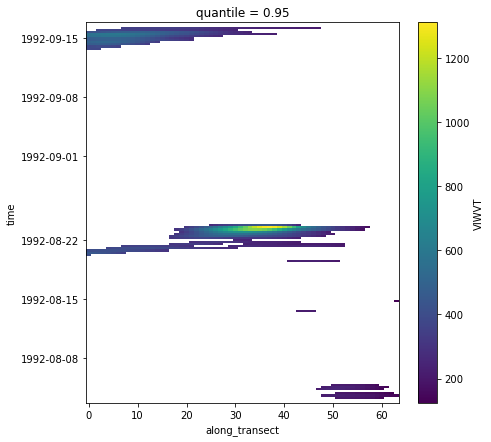

In [13]:
import matplotlib.patches as patches
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ivt_high.sel(time=slice(surge[2][0]-np.timedelta64(12, 'h'), surge[5][1]+np.timedelta64(12, 'h'))).plot(ax=ax)

for i in range(2, 6):
    print(surge[i][0], ' ', surge[i][1])
    pp3 = plt.Polygon([[0, surge[i][0]],
                   [60, surge[i][0]],
                   [0, surge[i][1]],
                      [60, surge[i][1]]])
    x = [45,61,61,45]
    y = [surge[i][0],surge[i][0],surge[i][1],surge[i][1]]
    ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=True))

    print(list(zip(x,y)))

In [14]:
plot_data = ivt_high.sel(time=slice(surge[2][0]-np.timedelta64(12, 'h'), surge[5][1]+np.timedelta64(12, 'h')))
print(plot_data)
plot_time = plot_data.time
print(plot_data.along_transect)

<xarray.DataArray 'VIWVT' (time: 181, along_transect: 64)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time      (time) datetime64[ns] 1992-08-02T18:00:00 ... 1992-09-16T18:00:00
    quantile  float64 0.95
Dimensions without coordinates: along_transect
<xarray.DataArray 'along_transect' (along_transect: 64)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
Coordinates:
    quantile  float64 0.95
Dimensions without coordinates: along_transect


In [15]:
import pandas as pd 

[2] [4.8]
[6] [9]
[70] [85]
[168] [179.5]
['1992-08-02T18', '1992-08-10T06', '1992-08-17T18', '1992-08-25T06', '1992-09-01T18', '1992-09-09T06', '1992-09-16T18']


/tempest/duan0000/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)
/tempest/duan0000/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)
/tempest/duan0000/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

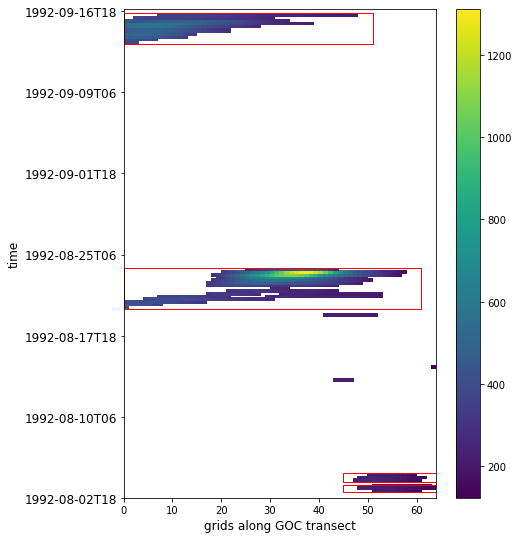

In [16]:
fig = plt.figure(figsize=(7, 9))
ax = fig.add_subplot(111)
pa = ax.pcolor(plot_data.data)
# 1st
x = [45,64,64,45]
start = np.where(plot_time==surge[2][0])[0]
end = np.where(plot_time==surge[2][1])[0]+.8
print(start, end)
y = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

# 2nd
x = [45,64,64,45]
start = np.where(plot_time==surge[3][0])[0]
end = np.where(plot_time==surge[3][1])[0]+1
print(start, end)
y = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

# 3rd
x = [0,61,61,0]
start = np.where(plot_time==surge[4][0])[0]
end = np.where(plot_time==surge[4][1])[0]+1
print(start, end)
y = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

# 4th
x = [0,51,51,0]
start = np.where(plot_time==surge[5][0])[0]
end = np.where(plot_time==surge[5][1])[0]+1.5
print(start, end)
y = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

plt.xlabel('grids along GOC transect', fontsize=12)
plt.ylabel('time', fontsize=12)
x = np.linspace(0, 180, 7).astype('int')
tick_time = np.take(plot_time.data, x)
ts = [pd.to_datetime(str(time)) for time in tick_time] 
d = [t.strftime('%Y-%m-%dT%H') for t in ts]
ax.set_yticks(ticks=x)
ax.set_yticklabels(d, fontsize=12)
print(d)
plt.colorbar(pa)

plt.show()

In [17]:
plot_data.data.shape
tp_plot_data = plot_data.data.T

[2] [4.8]
[6] [9]
[70] [85]
[168] [179.5]
['1992-08-02', '1992-08-10', '1992-08-17', '1992-08-25', '1992-09-01', '1992-09-09', '1992-09-16']


/tempest/duan0000/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)
/tempest/duan0000/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)
/tempest/duan0000/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

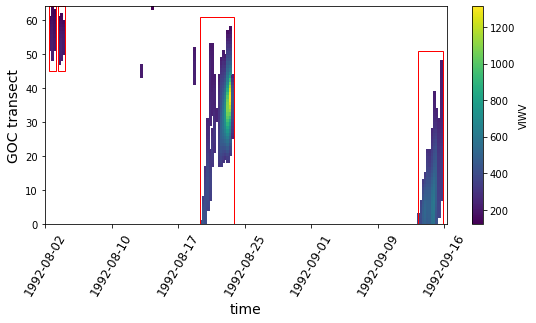

In [28]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(111)
pa = ax.pcolor(tp_plot_data)
# 1st
y = [45,64,64,45]
start = np.where(plot_time==surge[2][0])[0]
end = np.where(plot_time==surge[2][1])[0]+.8
print(start, end)
x = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

# 2nd
y = [45,64,64,45]
start = np.where(plot_time==surge[3][0])[0]
end = np.where(plot_time==surge[3][1])[0]+1
print(start, end)
x = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

# 3rd
y = [0,61,61,0]
start = np.where(plot_time==surge[4][0])[0]
end = np.where(plot_time==surge[4][1])[0]+1
print(start, end)
x = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

# 4th
y = [0,51,51,0]
start = np.where(plot_time==surge[5][0])[0]
end = np.where(plot_time==surge[5][1])[0]+1.5
print(start, end)
x = [start, start, end, end]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, edgecolor='red'))

plt.ylabel('GOC transect', fontsize=14)
plt.xlabel('time', fontsize=14)
y = np.linspace(0, 180, 7).astype('int')
tick_time = np.take(plot_time.data, y)
ts = [pd.to_datetime(str(time)) for time in tick_time] 
d = [t.strftime('%Y-%m-%d') for t in ts]
ax.set_xticks(ticks=y)
ax.set_xticklabels(d, fontsize=12, rotation=60)
print(d)
plt.colorbar(pa, label='VIWV')
plt.savefig('surge_example.png', dpi=150, bbox_inches='tight')
plt.show()

In [19]:
time = np.datetime64('2018-09-19T00:00:00.000000000')
start = np.datetime64('2018-09-17T12:00:00.000000000')
end = np.datetime64('2018-09-20T00:00:00.000000000')
timeframes = [time-np.timedelta64(6,'h')*i for i in range(5)]
count = 0
for frame in timeframes:
    if frame>=start and frame<=end:
        count+=1
print(count)

5


In [20]:
timeframes = [time-np.timedelta64(6,'h')*i for i in range(5)]
timeframes

[numpy.datetime64('2018-09-19T00:00:00.000000000'),
 numpy.datetime64('2018-09-18T18:00:00.000000000'),
 numpy.datetime64('2018-09-18T12:00:00.000000000'),
 numpy.datetime64('2018-09-18T06:00:00.000000000'),
 numpy.datetime64('2018-09-18T00:00:00.000000000')]

0, 6, 12, 18, 0

In [21]:
surge

{0: [numpy.datetime64('1992-07-05T06:00:00.000000000'),
  numpy.datetime64('1992-07-07T18:00:00.000000000')],
 1: [numpy.datetime64('1992-07-08T06:00:00.000000000'),
  numpy.datetime64('1992-07-08T18:00:00.000000000')],
 2: [numpy.datetime64('1992-08-03T06:00:00.000000000'),
  numpy.datetime64('1992-08-03T18:00:00.000000000')],
 3: [numpy.datetime64('1992-08-04T06:00:00.000000000'),
  numpy.datetime64('1992-08-04T18:00:00.000000000')],
 4: [numpy.datetime64('1992-08-20T06:00:00.000000000'),
  numpy.datetime64('1992-08-23T18:00:00.000000000')],
 5: [numpy.datetime64('1992-09-13T18:00:00.000000000'),
  numpy.datetime64('1992-09-16T06:00:00.000000000')],
 6: [numpy.datetime64('1992-09-17T12:00:00.000000000'),
  numpy.datetime64('1992-09-21T12:00:00.000000000')]}

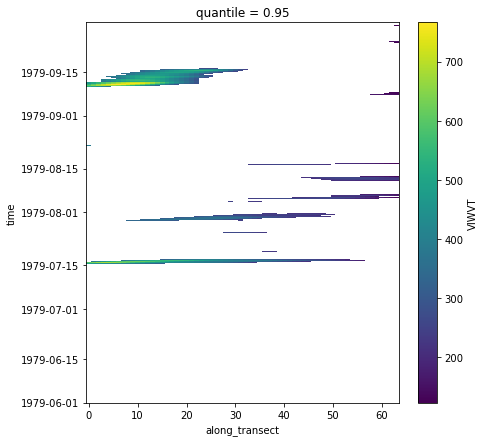

1979   8


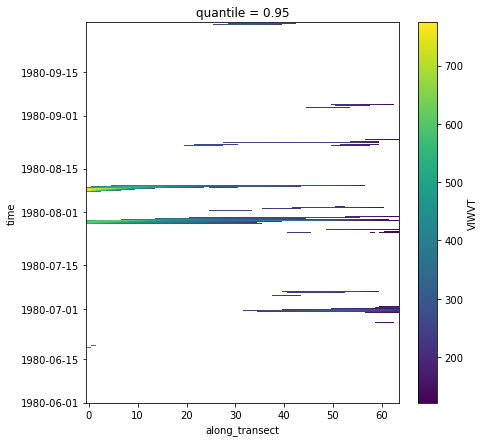

1980   13


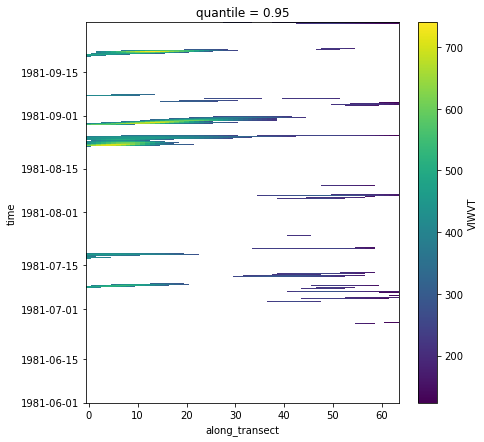

1981   16


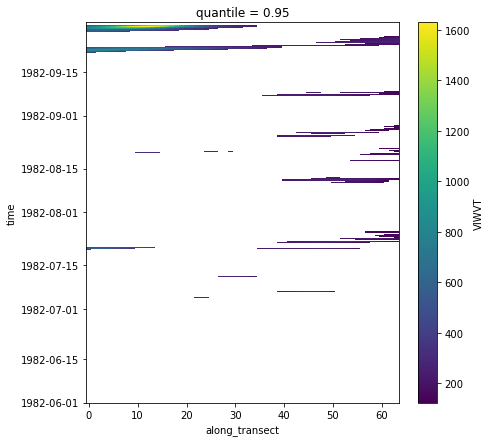

1982   17


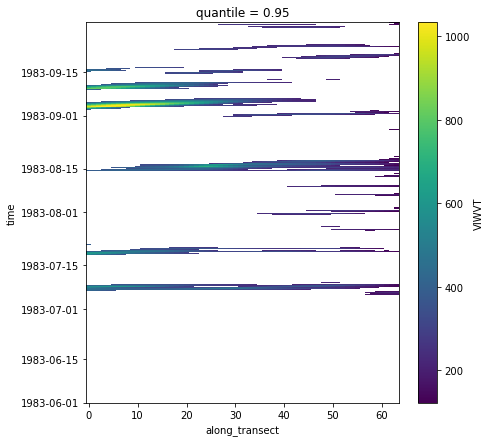

1983   20


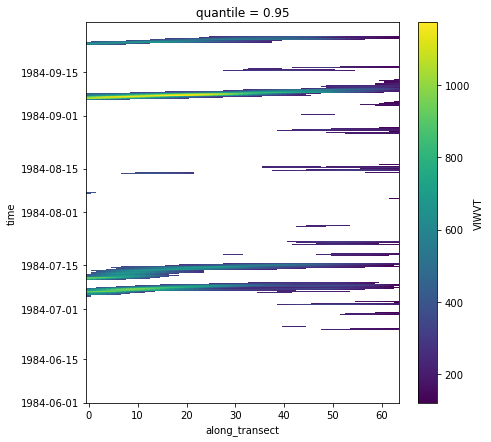

1984   19


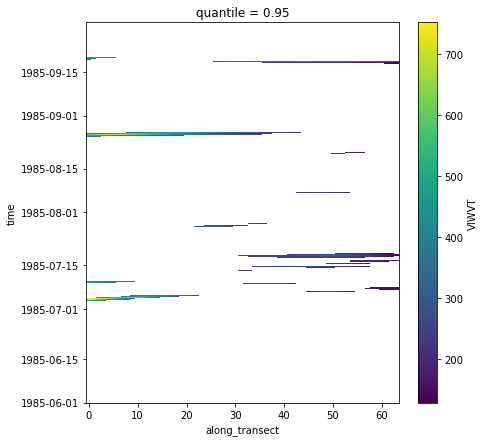

1985   12


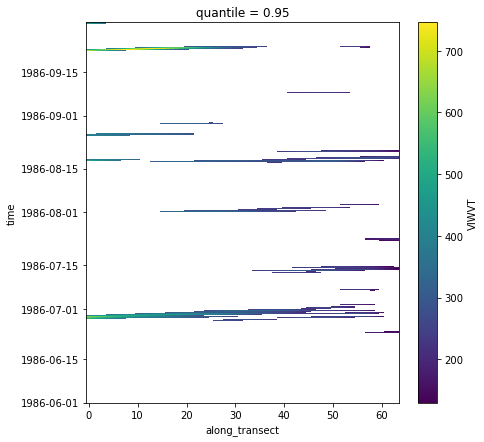

1986   15


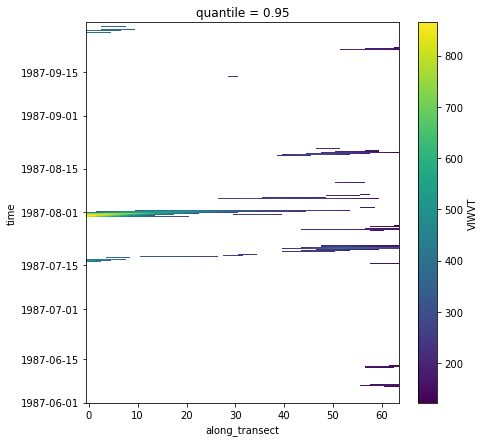

1987   14


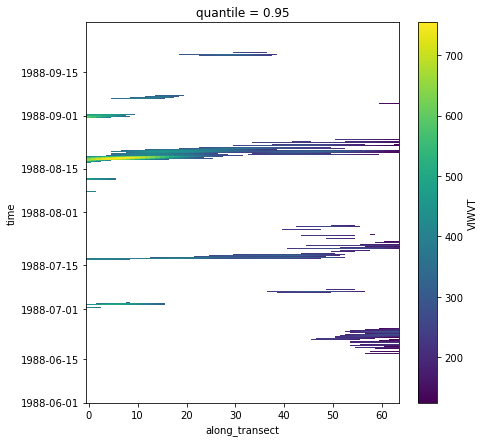

1988   20


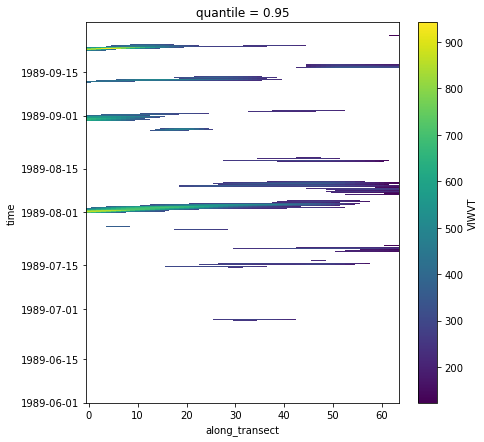

1989   14


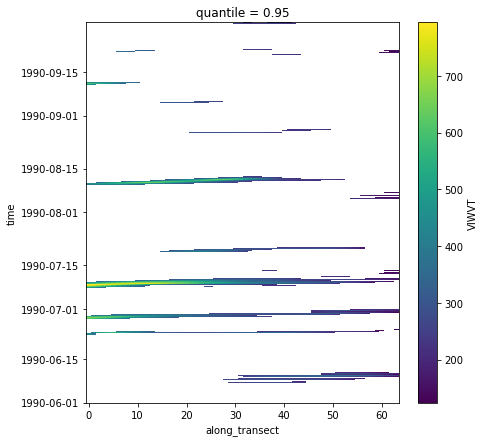

1990   19


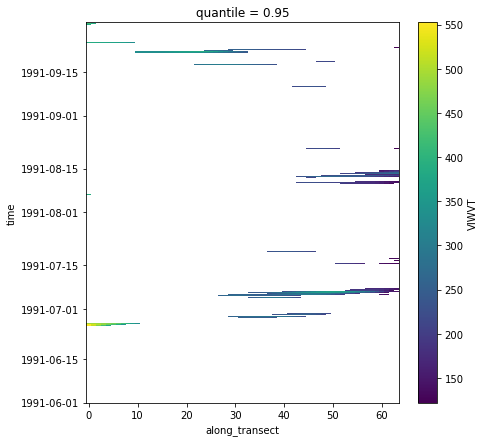

1991   11


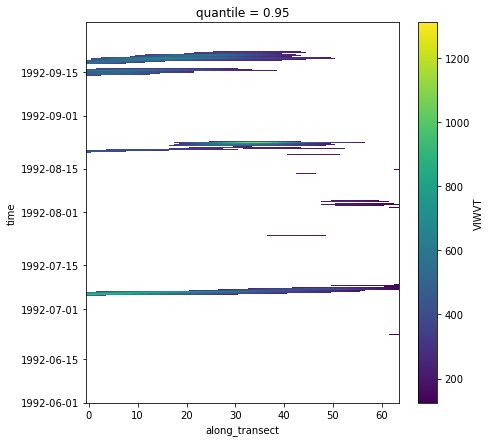

1992   7


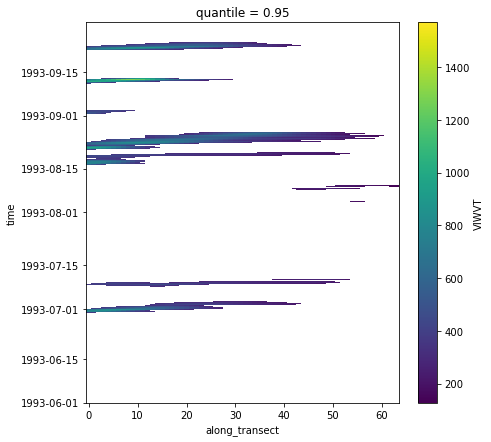

1993   10


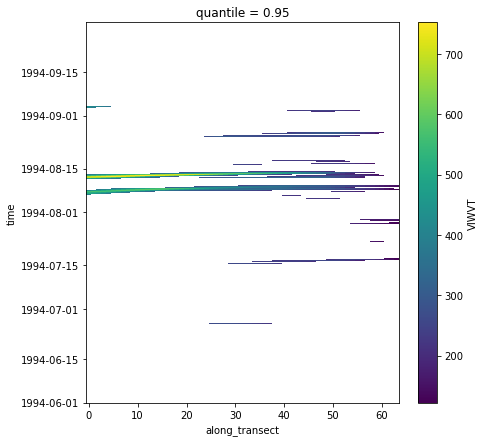

1994   12


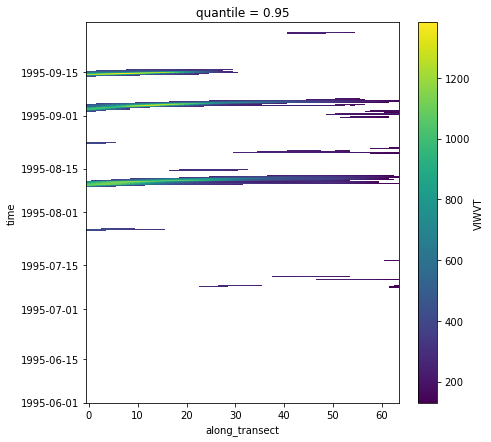

1995   13


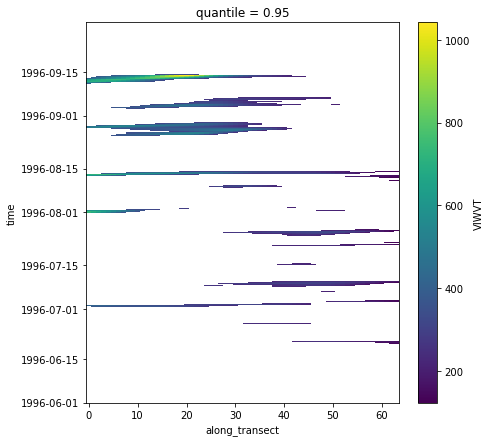

1996   14


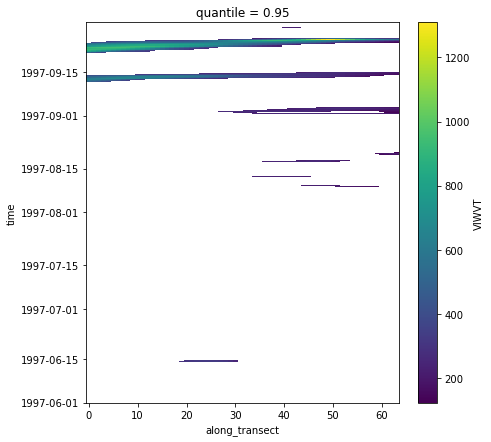

1997   7


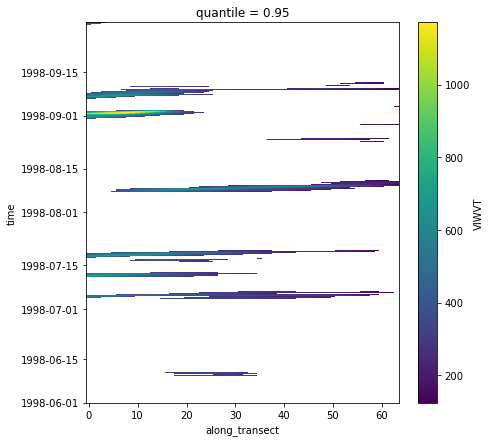

1998   12


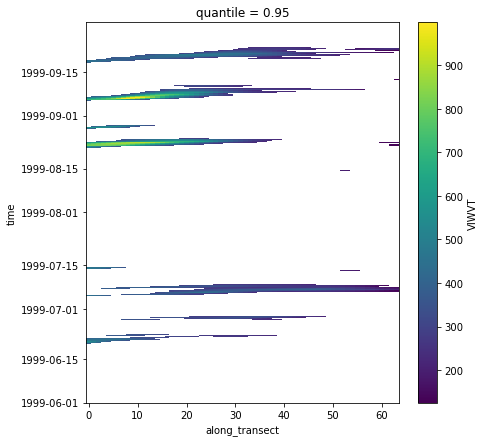

1999   11


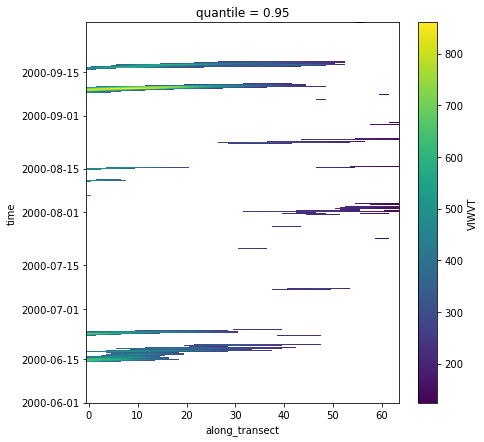

2000   11


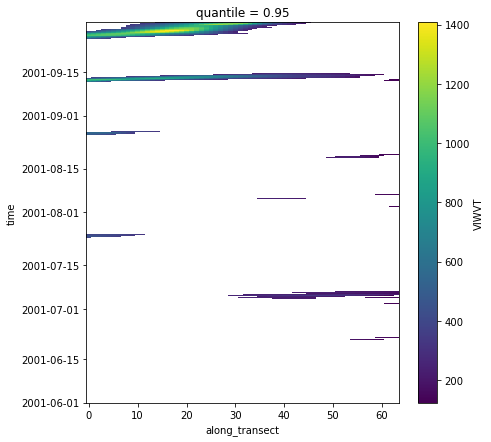

2001   8


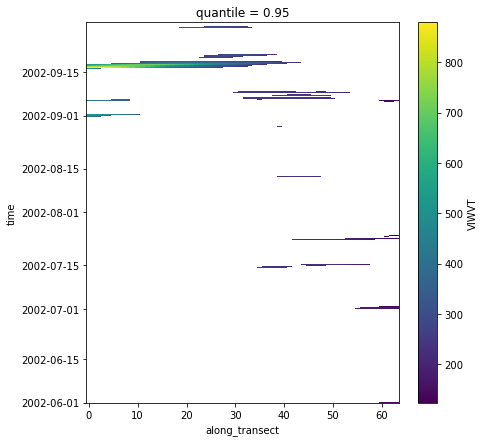

2002   10


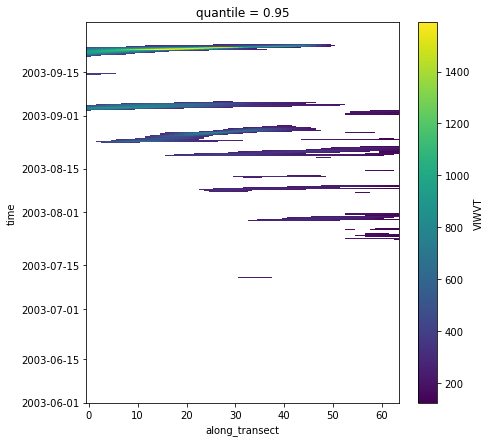

2003   13


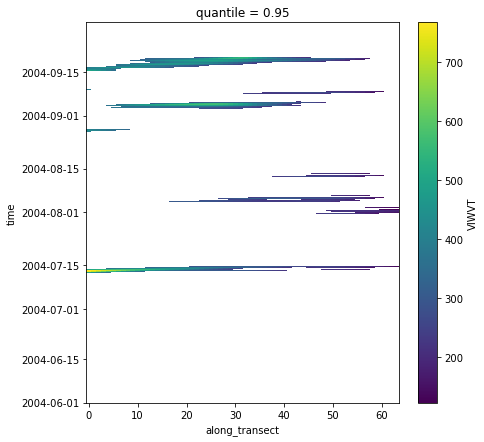

2004   9


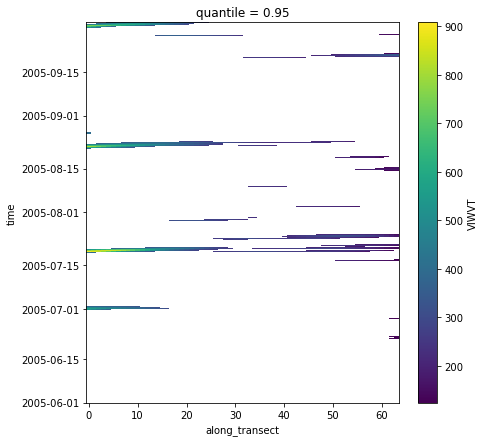

2005   14


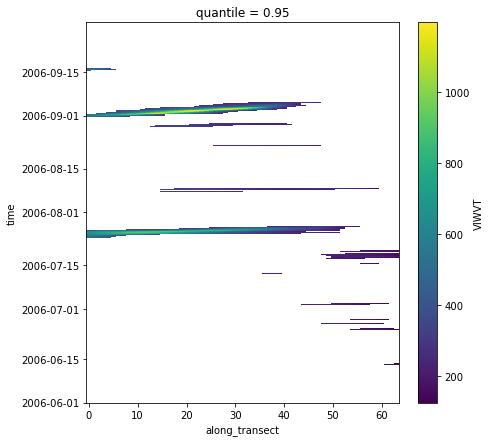

2006   14


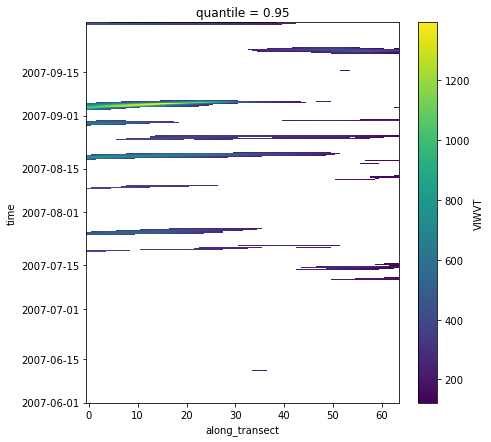

2007   13


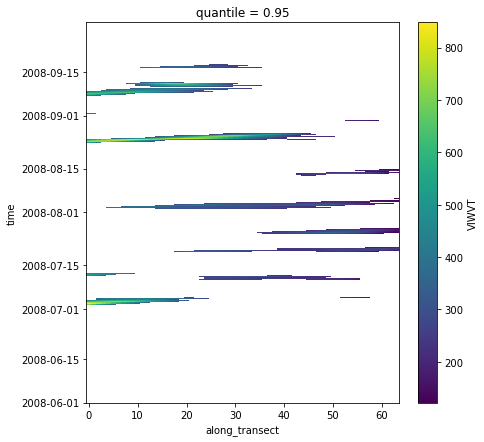

2008   11


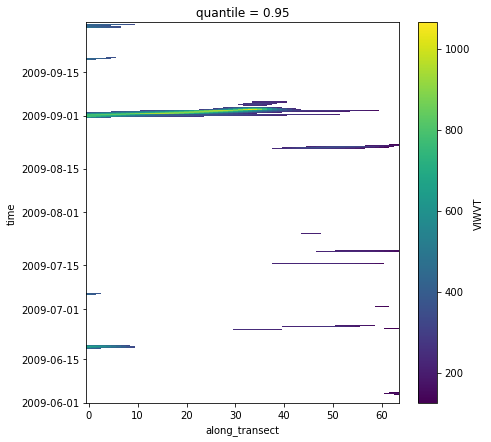

2009   11


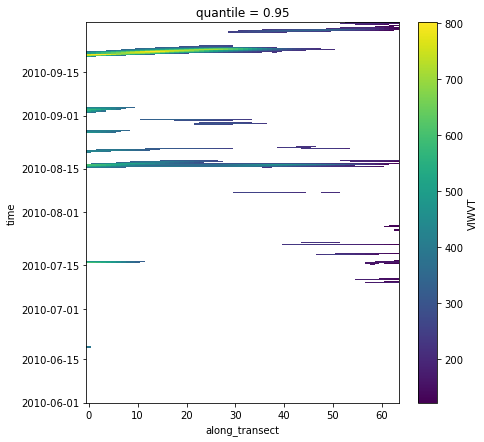

2010   19


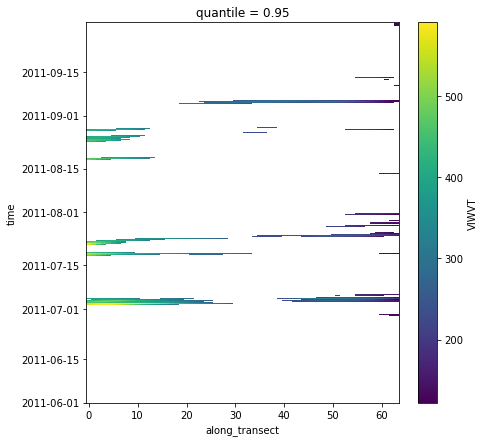

2011   18


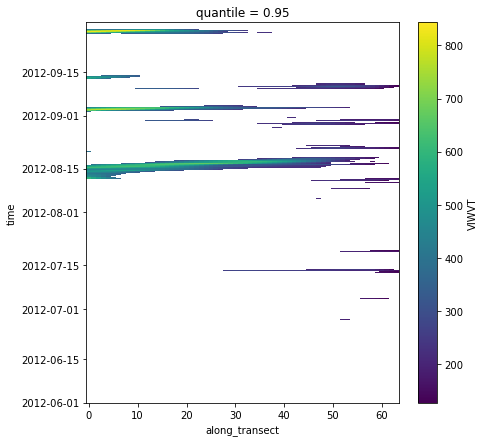

2012   11


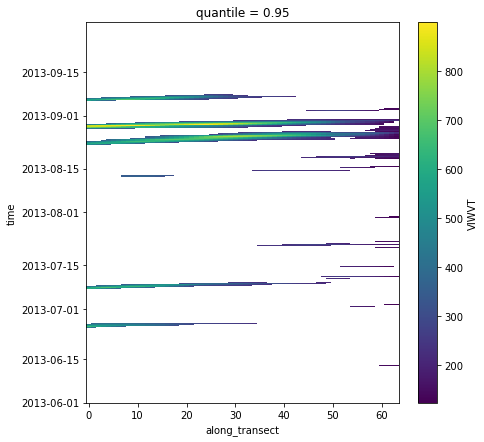

2013   13


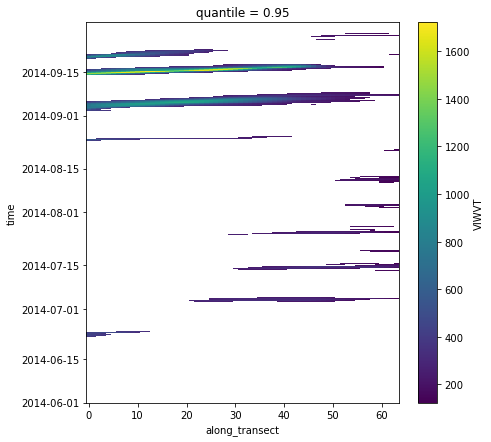

2014   17


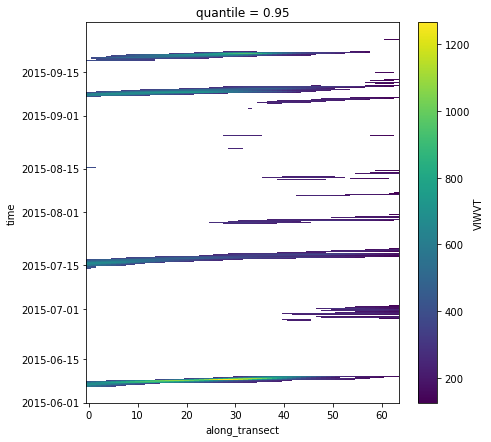

2015   16


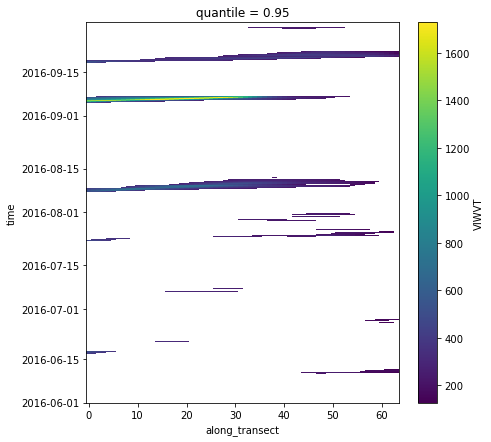

2016   14


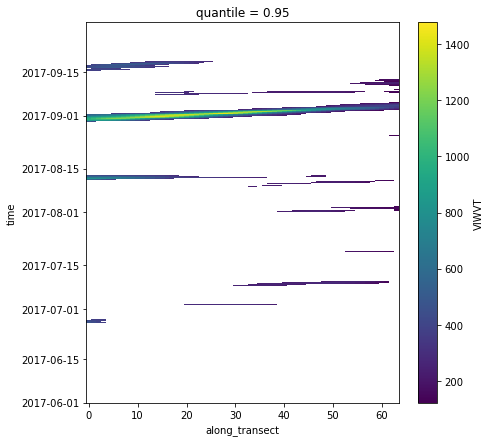

2017   11


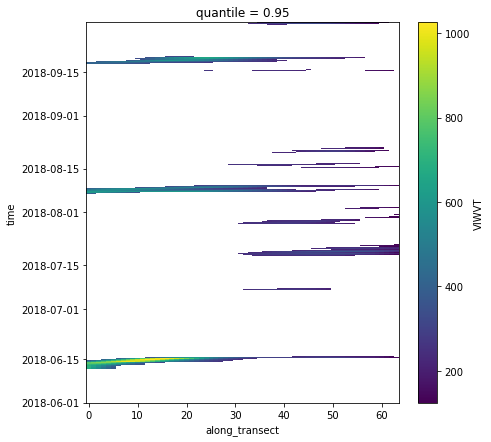

2018   12


In [36]:
surge_start_time = []
surge_end_time = []
for year in range(1979, 2019):
    surge, count = detect_surge(year, verbose=False)
    print(year, " ", count)
    for surge_id in range(count):
        surge_start_time.append(surge[surge_id][0])
        surge_end_time.append(surge[surge_id][1])

# Save

In [37]:
print(len(surge_start_time))
print(len(surge_end_time))
surge_index = np.arange(529)
start_time = xa.Variable(data=surge_start_time, dims=["index"])
end_time = xa.Variable(data=surge_end_time, dims=["index"])
surge = xa.Dataset(
    {"start_time": start_time, "end_time": end_time}, coords={"index": surge_index}
)
print(surge)

529
529
<xarray.Dataset>
Dimensions:     (index: 529)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 6 7 ... 522 523 524 525 526 527 528
Data variables:
    start_time  (index) datetime64[ns] 1979-07-15T12:00:00 ... 2018-09-30T06:...
    end_time    (index) datetime64[ns] 1979-07-16T18:00:00 ... 2018-09-30T18:...


In [38]:
surge.to_netcdf("MoistureSurge-6h.nc")